In [1]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [3]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, test_size = 0.2, stratify = y_train, random_state = 0)

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].max()

255

In [7]:
scaled_sub = x_sub.reshape(-1, 32, 32, 3) / 255
scaled_val = x_val.reshape(-1, 32, 32, 3) / 255
scaled_test = x_test.reshape(-1, 32, 32, 3) / 255

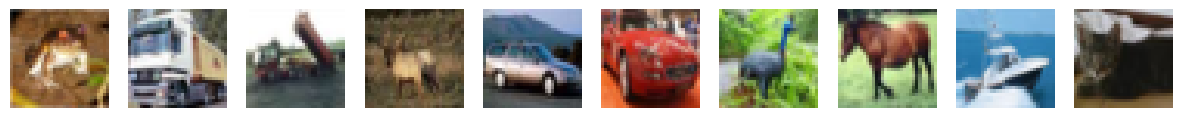

In [44]:
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i in range(10):
    axs[i].imshow(x_train[i])
    axs[i].axis("off")
plt.show()

In [45]:
[labels[i] for i in y_train[:10].flatten()]

['Frog',
 'Truck',
 'Truck',
 'Deer',
 'Automobile',
 'Automobile',
 'Bird',
 'Horse',
 'Ship',
 'Cat']

In [46]:
scaled_train = x_train / 255
scaled_test = x_test / 255

In [47]:
scaled_sub, scaled_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size = 0.2, stratify = y_train, random_state = 12)

In [49]:
scaled_sub.shape, scaled_val.shape, scaled_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

# 모델 구성

## 맛집 레시피

In [52]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same", input_shape = (32, 32, 3)))
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same", input_shape = (32, 32, 3)))
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Conv2D(128, kernel_size = 3, activation = "relu", padding = "same", input_shape = (32, 32, 3)))
model.add(keras.layers.Conv2D(128, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation = "softmax"))

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [53]:
opt = keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [54]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [55]:
history = model.fit(scaled_sub, y_sub, epochs = 300, validation_data = (scaled_val, y_val), callbacks = [early_stopping_cb])

Epoch 1/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 155s 122ms/step - accuracy: 0.1404 - loss: 2.2494 - val_accuracy: 0.2813 - val_loss: 1.9873
Epoch 2/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 166s 133ms/step - accuracy: 0.2919 - loss: 1.9393 - val_accuracy: 0.3821 - val_loss: 1.7275
Epoch 3/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 168s 135ms/step - accuracy: 0.3683 - loss: 1.7297 - val_accuracy: 0.4430 - val_loss: 1.5372
Epoch 4/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 166s 133ms/step - accuracy: 0.4151 - loss: 1.5900 - val_accuracy: 0.4717 - val_loss: 1.4678
Epoch 5/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 169s 135ms/step - accuracy: 0.4542 - loss: 1.4964 - val_accuracy: 0.4853 - val_loss: 1.4069
Epoch 6/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 184s 147ms/step - accuracy: 0.4823 - loss: 1.4256 - val_accuracy: 0.5360 - val_loss: 1.2882
Epoch 7/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 181s 145ms/step - accuracy: 0.5189 - loss: 1.3422 - val_accuracy: 0.5595 - val_loss: 1.2520
Epoch 8/300
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 198s 142ms/s

## 강사님 모델

In [57]:
model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(64, kernel_size = 4, activation = "relu", padding = "same", input_shape = (32, 32, 3)))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(64, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool2D(2))
model1.add(keras.layers.Dropout(0.2))


model1.add(keras.layers.Conv2D(128, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(128, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool2D(2))
model1.add(keras.layers.Dropout(0.25))


model1.add(keras.layers.Conv2D(256, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Conv2D(256, kernel_size = 4, activation = "relu", padding = "same"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.MaxPool2D(2))
model1.add(keras.layers.Dropout(0.35))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(256, activation = "relu"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Dropout(0.5))
model1.add(keras.layers.Dense(10, activation = "softmax"))

- BatchNormalization : 모든 그래프를 평균이 0, 분산이 1의 분포를 가진 그래프로 바꿔주기
    - 장점 : 로스가 일정하게 떨어짐(훈련 성능이 상승)

In [58]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)
model1.compile(loss = "sparse_categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])

In [61]:
model1.fit(scaled_sub, y_sub, epochs = 100, validation_data = (scaled_val, y_val), callbacks = [early_stopping_cb], batch_size = 64)

Epoch 1/100
 84/625 ━━━━━━━━━━━━━━━━━━━━ 14:25 2s/step - accuracy: 0.2717 - loss: 2.5598


KeyboardInterrupt



### 사전학습모델

- 이미지 속에서 최대한 특징들을 잘 뽑아낼 수 있는 방법을 미리 학습하는 것
    - ex) 글도 모르는 아이에게 소설 쓰는 법을 가르치는 것보다 한글을 깨우치고 있는 아이에게 글을 쓰는 법을 가르치는 것이 더 수월하기 때문
    
- transformer
- Resnet

# ResNet50

In [62]:
base_model = keras.applications.ResNet50(weights = "imagenet", include_top = False, input_shape = (32, 32, 3))
# 현재 학습하려는 모델이 imagenet과 비슷하기 때문에 ResNet에서 imagenet을 사용할 수 있다.

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 51s 1us/step


In [63]:
base_model.layers

[<InputLayer name=input_layer_18, built=True>,
 <ZeroPadding2D name=conv1_pad, built=True>,
 <Conv2D name=conv1_conv, built=True>,
 <BatchNormalization name=conv1_bn, built=True>,
 <Activation name=conv1_relu, built=True>,
 <ZeroPadding2D name=pool1_pad, built=True>,
 <MaxPooling2D name=pool1_pool, built=True>,
 <Conv2D name=conv2_block1_1_conv, built=True>,
 <BatchNormalization name=conv2_block1_1_bn, built=True>,
 <Activation name=conv2_block1_1_relu, built=True>,
 <Conv2D name=conv2_block1_2_conv, built=True>,
 <BatchNormalization name=conv2_block1_2_bn, built=True>,
 <Activation name=conv2_block1_2_relu, built=True>,
 <Conv2D name=conv2_block1_0_conv, built=True>,
 <Conv2D name=conv2_block1_3_conv, built=True>,
 <BatchNormalization name=conv2_block1_0_bn, built=True>,
 <BatchNormalization name=conv2_block1_3_bn, built=True>,
 <Add name=conv2_block1_add, built=True>,
 <Activation name=conv2_block1_out, built=True>,
 <Conv2D name=conv2_block2_1_conv, built=True>,
 <BatchNormalization

In [65]:
# resnet 출력층 구성
resnet = keras.Sequential()
resnet.add(base_model)
resnet.add(keras.layers.Flatten())
resnet.add(keras.layers.Dense(512, activation = "relu"))
resnet.add(keras.layers.BatchNormalization())
resnet.add(keras.layers.Dropout(0.5))
resnet.add(keras.layers.Dense(10, activation = "softmax"))

In [66]:
adam = keras.optimizers.Adam(learning_rate = 0.0001)
resnet.compile(loss = "sparse_categorical_crossentropy", optimizer = adam, metrics = ["accuracy"])

In [68]:
resnet.fit(scaled_sub, y_sub, epochs = 10, validation_data = (scaled_val, y_val), callbacks = [early_stopping_cb], batch_size = 64)

Epoch 1/10
  6/625 ━━━━━━━━━━━━━━━━━━━━ 23:42 2s/step - accuracy: 0.0888 - loss: 3.6791


KeyboardInterrupt

